In [35]:
import numpy as np 
import pandas as pd

## load the dataset

In [36]:
de_train = pd.read_csv('train.csv')
de_test = pd.read_csv('test.csv')

de_train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [37]:
de_test.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,18767.000000,75022.000000,18766.000000,18767.000000,75026.00000,93800.000000,93800.000000
mean,187599.500000,40.321685,3.158576,3.011797,7.674016,2.939522,2.96092,6.247335,2.978763
std,27077.871962,12.393480,1.386666,1.403563,1.465056,1.374242,1.41071,3.858191,1.414604
min,140700.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.00000,0.000000,1.000000
25%,164149.750000,29.000000,2.000000,2.000000,6.330000,2.000000,2.00000,3.000000,2.000000
50%,187599.500000,42.000000,3.000000,3.000000,7.800000,3.000000,3.00000,6.000000,3.000000
75%,211049.250000,51.000000,4.000000,4.000000,8.940000,4.000000,4.00000,10.000000,4.000000
max,234499.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.00000,12.000000,5.000000


In [38]:
de_train.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [39]:
de_train = de_train.drop(['id'],axis=1)

In [40]:
test_id = de_test['id'].copy(deep=False)
de_test = de_test.drop(['id'],axis=1)

## clear nulls (but we need to do a bit more)

In [41]:
import missingno

<Axes: >

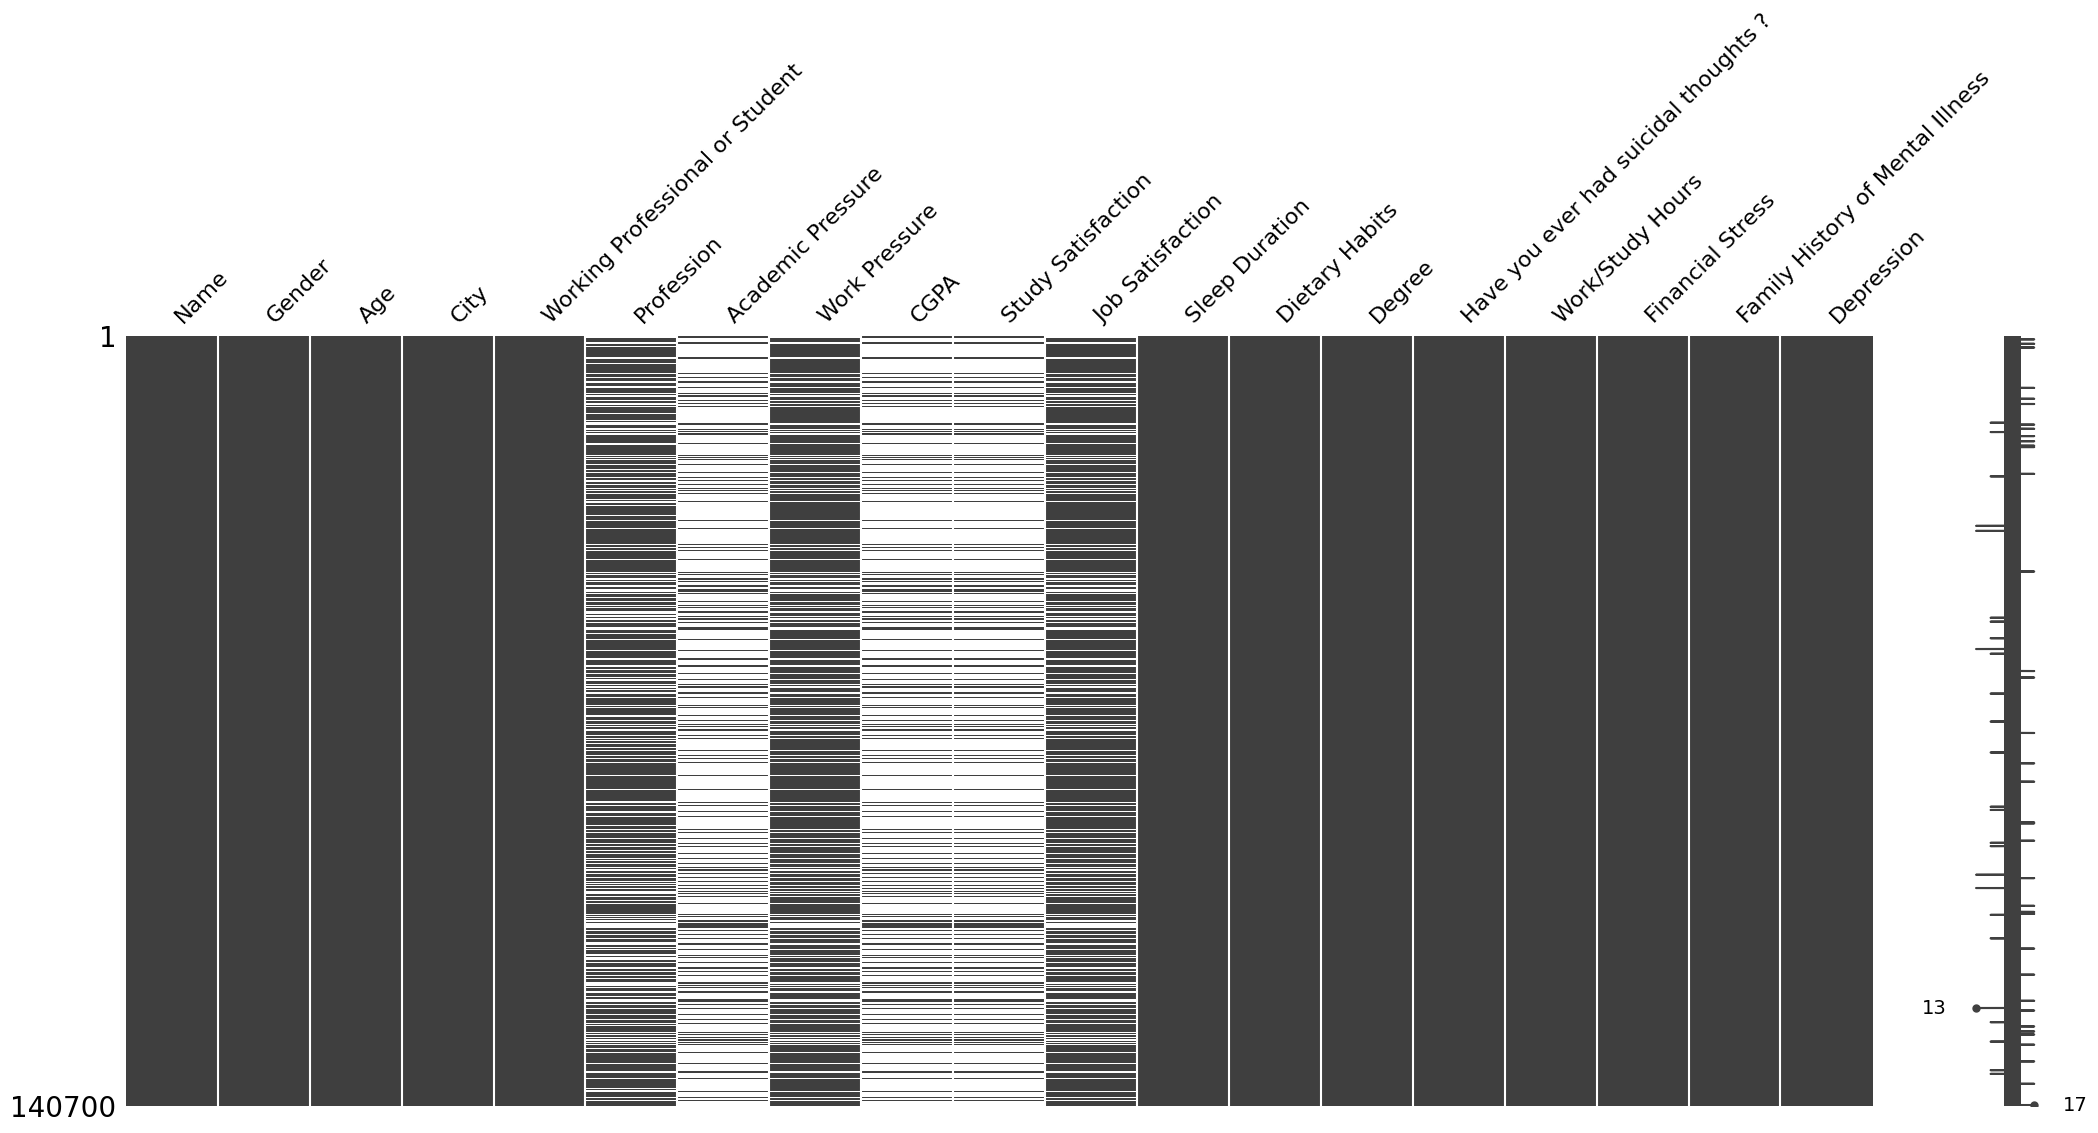

In [42]:
missingno.matrix(de_train)

<Axes: >

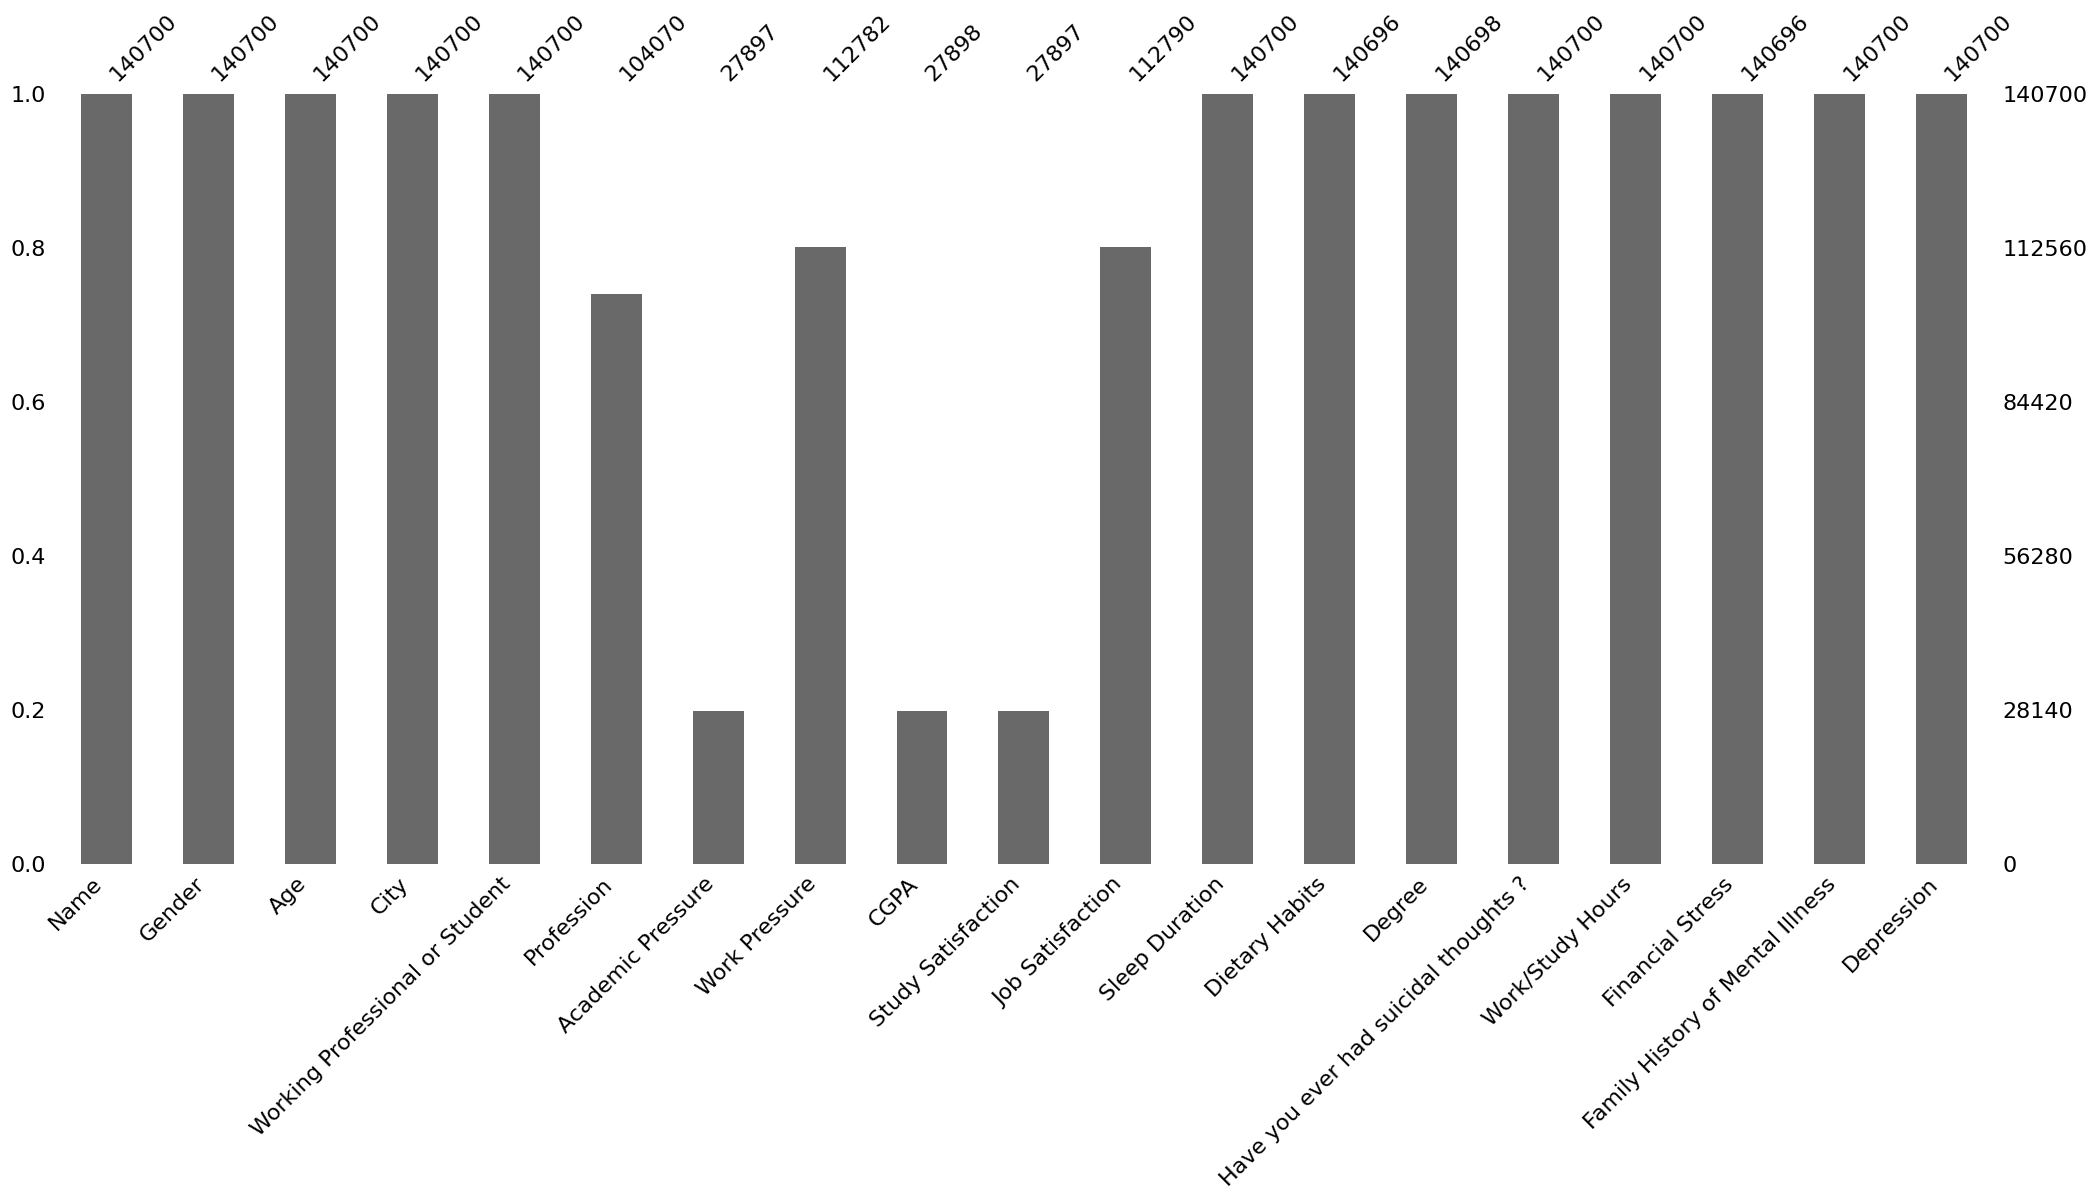

In [43]:
missingno.bar(de_train)

<Axes: >

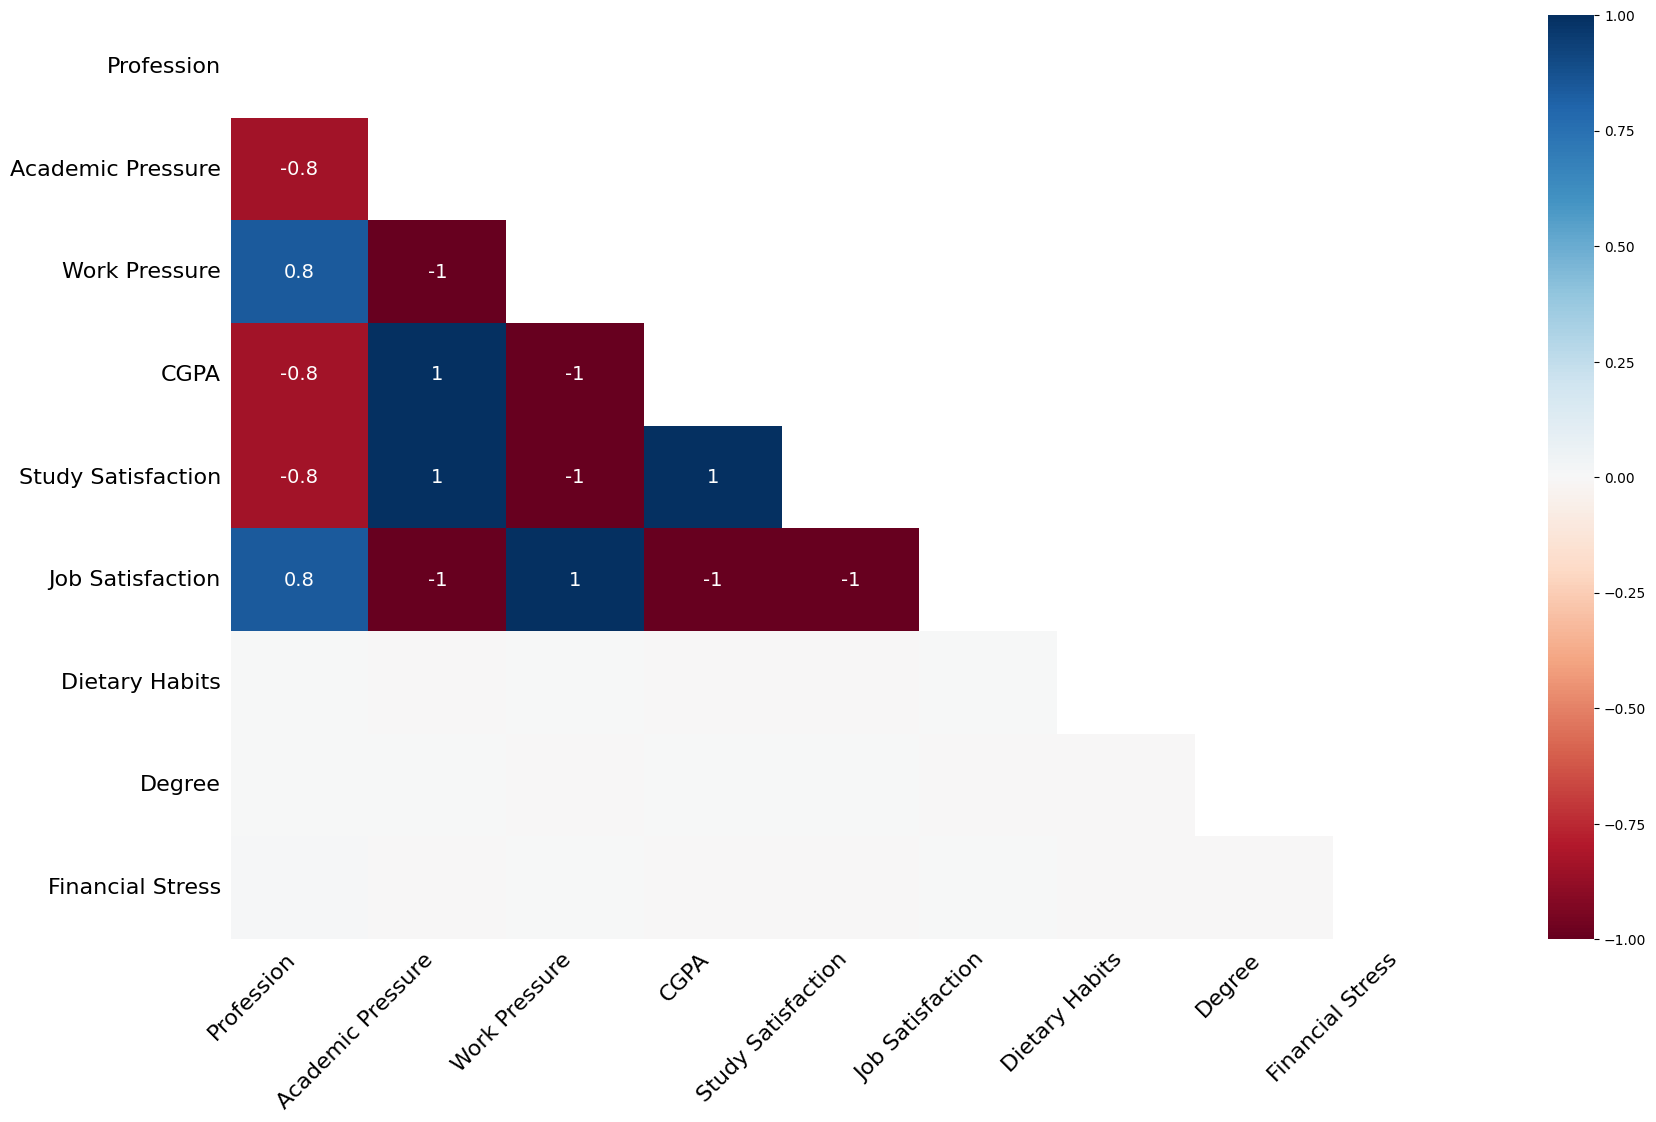

In [44]:
missingno.heatmap(de_train)

It looks like except professions, nulls in other columns have a strong correlationof $\mid 1\mid$. This may be due to specific properties in Profession column. Let's take a closer look on distribution of this column

### doing a bit of analysis on Profession column

In [45]:
de_train.Profession.unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

We can see that there are some errors in this column:
- B.Com, BE, Student, MBA, LLM, BCA, BBA, MBBS, B.Ed, M.Ed, Phd should be belong to student (will merge them all to 'Student')
- Yogesh, Patna, Nagpur, Pranav, Visakhapatnam, Yuvrej should be city names
- Researcher, Research Analyst, and Academic should be similar (and we should merge them to 'Reseracher')
- Moderate and Unveil are not real job names 
  
We will look into the count on each values of job in our data

In [46]:
de_train.Profession = de_train.Profession.replace(['Research Analyst', 'Academic'], 'Researcher')
de_train.Profession = de_train.Profession.replace(['B.Com', 'BE', 'Student', 'MBA', 'LLM', 'BCA', 
                                                    'BBA', 'MBBS', 'B.Ed', 'M.Ed', 'PhD'], 'Student')

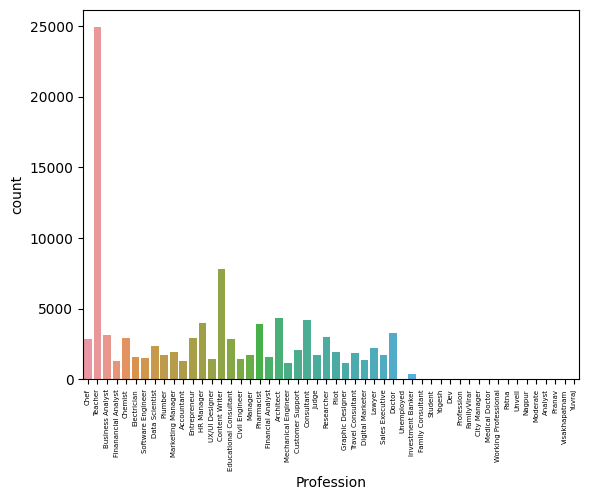

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(data=de_train, x='Profession')
_ = plt.xticks(rotation=90, fontsize=5)

In [48]:
de_train.Profession.isnull().sum()

36630

In [49]:
profession_null = de_train[de_train.Profession.isnull()]

In [50]:
profession_null

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,3.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
140690,Rashi,Female,18.0,Ludhiana,Student,NaN,5.0,NaN,6.88,2.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1


In [57]:
profession_null.loc[:,'Working Professional or Student']

2                      Student
8                      Student
26                     Student
29        Working Professional
30                     Student
                  ...         
140686                 Student
140689                 Student
140690                 Student
140695    Working Professional
140699                 Student
Name: Working Professional or Student, Length: 36630, dtype: object

([<matplotlib.patches.Wedge at 0x1d38d571960>,
 [Text(-0.8036843055296858, 0.7510602752411198, 'Student'),
  Text(0.8036842703700157, -0.7510603128642971, 'Working Professional')],
 [Text(-0.43837325756164675, 0.40966924104061075, '76.1%'),
  Text(0.43837323838364484, -0.4096692615623438, '23.9%')])

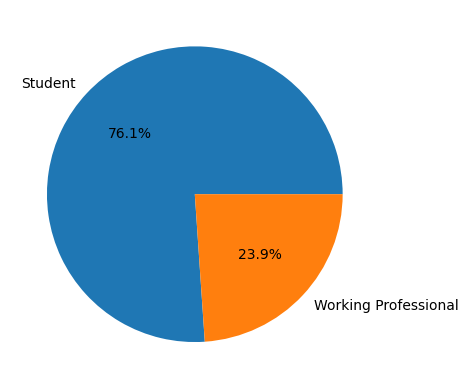

In [61]:
value_counts = profession_null['Working Professional or Student'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

In [63]:
error = profession_null[profession_null['Working Professional or Student']=='Working Professional']
error.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0
43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
48,Anand,Male,38.0,Ghaziabad,Working Professional,NaN,NaN,2.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0
50,Raunak,Male,21.0,Pune,Working Professional,NaN,NaN,4.0,NaN,NaN,5.0,5-6 hours,Healthy,Class 12,Yes,8.0,5.0,Yes,0


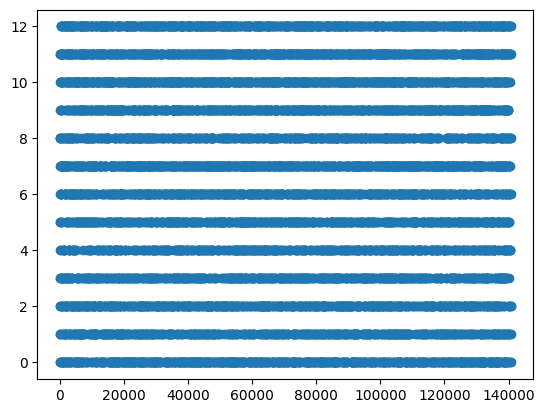

In [68]:
plt.scatter(y = error['Work/Study Hours'], x = error.index)

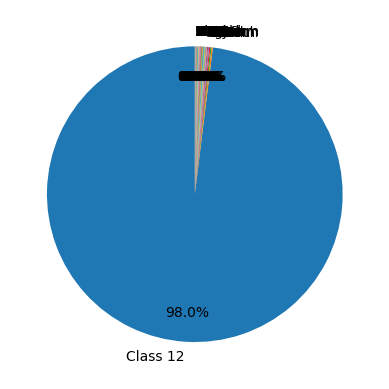

In [77]:
val_count_d = error.Degree.value_counts()
_ = plt.pie(val_count_d, labels=val_count_d.index, autopct='%1.1f%%',startangle=90, labeldistance=1.1,  pctdistance=0.8)

#### Relation on Job and Education level? (Especially about the Class 12 Degree)
Knowing this may help us to fill nulls in the Profession column

In [94]:
degree_count = de_train['Degree'].value_counts()
degree_count

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [95]:
class_12 = de_train[de_train['Degree']=='Class 12']
class_12.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0
43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
48,Anand,Male,38.0,Ghaziabad,Working Professional,NaN,NaN,2.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0
50,Raunak,Male,21.0,Pune,Working Professional,NaN,NaN,4.0,NaN,NaN,5.0,5-6 hours,Healthy,Class 12,Yes,8.0,5.0,Yes,0


In [96]:
job_count_12 = class_12.Profession.value_counts()

In [93]:
job_count_12

Profession
Teacher                25
Judge                   3
HR Manager              3
Chef                    3
Graphic Designer        3
Consultant              2
Financial Analyst       2
Plumber                 2
Pilot                   2
Doctor                  2
Architect               1
Software Engineer       1
Civil Engineer          1
Digital Marketer        1
Chemist                 1
Travel Consultant       1
Pharmacist              1
Customer Support        1
Finanancial Analyst     1
Manager                 1
Lawyer                  1
Content Writer          1
Name: count, dtype: int64

In [92]:
sum(job_count_12)

59

Okay, things become a bit frustrating at this point. We need to do a lot of cleaning and stuffs Also we may want to look into our data more closely at this point because the entire dataset is quite noisy